In [20]:
# define imports 
import  os
import random
import pickle
import shutil
import numpy as np
import pandas as pd

# import scikit-learn modules  
from sklearn.neighbors import NearestNeighbors

# import plotting libraries 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

SEED = 42
os.environ["PYTHONHASHSEED"] = str(SEED)
# seed the global RNG 
random.seed(SEED)
# seed the global NumPy RNG
np.random.seed(SEED)

In [71]:
def compute_ad(X, y, filename, n_neigh=5, seed=SEED):

    """This function calculates the applicability domain (AD) threshold as the 
    95th percentile of the distribution of average distances to the nearest neighbors.

    :param X: an array of (n_samples, n_features)
    :param y: an array of keys 
    :param filename: path to save the model
    :param n_neigh: an integer number of nearest neighbors
    :param seed: seed for reproducibility 
    :return: a dictionary with neighbors and distances for each key, 
        and an integer storing the AD threshold
    """
    
    # seed the global RNG 
    random.seed(seed)
    # seed the global NumPy RNG
    np.random.seed(seed)

    nn_dict = {}
    print("Number of queries:", X.shape[0])

    # compute nearest neighbors 
    neigh_model = NearestNeighbors(n_neighbors=n_neigh + 1, metric="cosine")         
    # fit the nearest neighbors estimator                          
    neigh_model.fit(X)
    # save model 
    pickle.dump(neigh_model, open(filename, "wb"))
                            
    for i in range(len(X)):
        # return indices of and distances to the neighbors of the query 
        nn = neigh_model.kneighbors(X[i].reshape(1, -1), return_distance=True)    
        
        # define nn dictionary 
        nn_dict[y[i]] = {'keys'      : y[nn[1]], 
                         'distances' : nn[0]}

    # compute distances distribution 
    nn_dist = []
    for k in nn_dict.keys():

        nn_list = []
        # remove the query itself or the closest neighbor if duplicated
        idx = np.where(nn_dict[k]['keys'] == k)[0]
        idx = int(idx) if idx else 0

        # get list of average distance
        nn_list = list(nn_dict[k]['distances'][0])
        nn_list.pop(idx)
        nn_dist.append(np.mean(nn_list))

    # compute AD threshold 
    ad_thr = np.round(np.percentile(nn_dist, 95), 2)
                
    # plot distances distribution
    fig, axes = plt.subplots(1, 2, figsize=(14, 4))
    sns.boxplot(ax=axes[0], x=nn_dist, palette="husl", showmeans=True, 
                meanprops={"marker" : "s", "markerfacecolor" : "white",
                            "markeredgecolor" : "blue"}, 
                linewidth=1.5)
    sns.distplot(ax=axes[1], x=nn_dist, color="#e77c8d")
    fig.suptitle("Average distance distribution of " + str(n_neigh) + " NN")

    return nn_dict, ad_thr

In [8]:
# define paths
dataset_path = "../cti_datasets/AP_CTIs/sampled"
output_path = "../tmp"
# remove temporary folder if it exists
if os.path.exists(output_path): shutil.rmtree(output_path)
os.mkdir(output_path)

In [53]:
# seaborn settings
sns.set_style("white")
sns.set(font_scale=1.2)

- F1-F2

In [54]:
# load F1F2 dataset 
F1F2_ds = {}
with open(dataset_path + "/F1F2_sampled_CT_ds.pkl", 'rb') as f:
   F1F2_ds['X'] = pickle.load(f)
   F1F2_ds['y'] = pickle.load(f)
f.close()
F1F2_ds['X'].shape

(28699, 384)

In [55]:
# get vectors for molecules according to inchikeys 
mol_idx = list([c[0] for c in F1F2_ds['y'].index])
mol_unique = pd.DataFrame(F1F2_ds['X'], index=mol_idx)
mol_unique = mol_unique.reset_index().drop_duplicates(subset='index', 
                                                      keep='first').set_index('index')
mol_unique  

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
index,,,,,,,,,,,,,,,,,,,,,
QAXXQMIHMLTJQI-UHFFFAOYSA-N,0.097784,0.074101,-0.105543,0.099570,0.105136,0.089398,0.087111,-0.098701,0.100467,0.101649,...,-0.724767,-0.217470,-1.699743,1.962188,-0.568347,-1.481404,0.737854,1.353076,-0.399320,-1.590846
CHBAWFGIXDBEBT-UHFFFAOYSA-N,-0.073553,-0.114140,-0.125838,-0.111785,0.124383,-0.017625,0.019627,0.010526,0.050910,0.077817,...,3.047066,-0.692130,1.552718,-1.053926,-0.274224,0.199977,-1.593605,-1.927694,-0.534492,2.346185
OWWIWYDDISJUMY-UHFFFAOYSA-N,-0.024266,-0.100363,0.116520,-0.114182,-0.009417,0.011726,0.088584,-0.004259,0.091036,-0.082536,...,0.066910,0.655984,1.686490,1.713662,-1.164498,0.233988,0.551067,2.187974,-0.375483,-0.403651
ZFFMLCVRJBZUDZ-UHFFFAOYSA-N,-0.075437,-0.108531,0.105531,0.103923,0.092597,0.100645,-0.054267,0.039637,-0.079724,0.046649,...,0.772657,0.258756,0.604500,1.347208,-0.220165,-0.909278,3.445991,2.906176,0.671094,0.237792
HDGQICNBXPAKLR-UHFFFAOYSA-N,-0.112380,-0.076145,0.100808,0.058034,0.101819,0.110709,0.111232,-0.000714,-0.065637,0.109834,...,1.820981,2.332963,-1.492655,1.345804,-1.115839,3.085401,-0.975804,1.059001,-0.820279,-2.477230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
UISKIUIWPSPSAV-UHFFFAOYSA-N,-0.077331,-0.019814,0.080467,-0.084145,0.091664,-0.097905,0.112330,0.109403,0.012285,-0.112307,...,-1.568487,0.977143,-1.641257,1.311943,-1.286291,-1.345332,-1.898400,-1.068034,1.942832,-3.132106
MATGKVZWFZHCLI-LSDHHAIUSA-N,0.097269,-0.013156,-0.109230,-0.107781,0.060593,-0.107983,-0.101806,0.096926,0.105069,-0.109150,...,-1.585970,-1.709559,-1.967317,-2.039445,-0.306166,-0.331484,4.012916,-2.231691,-1.175249,-1.491115
MCSAJNNLRCFZED-UHFFFAOYSA-N,0.019567,0.130106,-0.119593,0.034670,0.108944,0.059048,0.090810,0.036945,0.102738,0.055465,...,-1.537250,0.047262,-2.084028,-0.435352,-0.610545,0.206409,0.157444,0.955766,0.247949,-0.265293


In [56]:
# how many molecules are in positives? 
pos_mol_unique = set([pos[0] for pos in F1F2_ds['y'].iloc[np.where(F1F2_ds['y'].y == 1)].index])
len(pos_mol_unique)

499

In [57]:
# how many molecules are in negatives?
neg_mol_unique = set([neg[0] for neg in F1F2_ds['y'].iloc[np.where(F1F2_ds['y'].y == 0)].index])
len(neg_mol_unique)

1051

In [58]:
# how many molecules are in both sets?
common_mol = pos_mol_unique.intersection(neg_mol_unique)
len(common_mol)

185

In [59]:
# get unique vectors for targets
tg_idx = list([c[1] for c in F1F2_ds['y'].index])
tg_unique = pd.DataFrame(F1F2_ds['X'], index=tg_idx)
tg_unique = tg_unique.reset_index().drop_duplicates(subset='index', 
                                                    keep='first').set_index('index')
tg_unique

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
index,,,,,,,,,,,,,,,,,,,,,
P18507,0.097784,0.074101,-0.105543,0.099570,0.105136,0.089398,0.087111,-0.098701,0.100467,0.101649,...,-0.724767,-0.217470,-1.699743,1.962188,-0.568347,-1.481404,0.737854,1.353076,-0.399320,-1.590846
Q8TD30,-0.073553,-0.114140,-0.125838,-0.111785,0.124383,-0.017625,0.019627,0.010526,0.050910,0.077817,...,3.047066,-0.692130,1.552718,-1.053926,-0.274224,0.199977,-1.593605,-1.927694,-0.534492,2.346185
P58215,-0.024266,-0.100363,0.116520,-0.114182,-0.009417,0.011726,0.088584,-0.004259,0.091036,-0.082536,...,0.066910,0.655984,1.686490,1.713662,-1.164498,0.233988,0.551067,2.187974,-0.375483,-0.403651
Q8WZA2,-0.075437,-0.108531,0.105531,0.103923,0.092597,0.100645,-0.054267,0.039637,-0.079724,0.046649,...,0.772657,0.258756,0.604500,1.347208,-0.220165,-0.909278,3.445991,2.906176,0.671094,0.237792
Q8TCC7,-0.112380,-0.076145,0.100808,0.058034,0.101819,0.110709,0.111232,-0.000714,-0.065637,0.109834,...,1.820981,2.332963,-1.492655,1.345804,-1.115839,3.085401,-0.975804,1.059001,-0.820279,-2.477230
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
P04798,0.075778,0.074156,-0.114063,0.108996,-0.049792,-0.098437,0.125833,-0.105144,0.103913,-0.007404,...,0.368604,0.238510,-1.580742,0.877825,-0.187445,0.642465,1.285456,0.723906,0.655317,0.916176
Q9Y6A2,-0.112380,-0.076145,0.100808,0.058034,0.101819,0.110709,0.111232,-0.000714,-0.065637,0.109834,...,-1.378780,0.934827,1.421075,-3.511967,-1.886457,-1.157934,0.943616,2.161161,-1.309453,-2.083608
Q01196,-0.039591,-0.084749,0.060648,0.066061,0.134957,0.086383,0.110940,-0.032259,0.075332,-0.039319,...,0.861484,2.353953,2.416390,1.296928,0.698221,0.902511,0.746462,1.728103,3.146249,-1.594491


In [60]:
# how many targets are in positives?   
pos_tg_unique = set([pos[1] for pos in F1F2_ds['y'].iloc[np.where(F1F2_ds['y'].y == 1)].index])
len(pos_tg_unique)

223

In [61]:
# how many targets are in negatives?
neg_tg_unique = set([neg[1] for neg in F1F2_ds['y'].iloc[np.where(F1F2_ds['y'].y == 0)].index])
len(neg_tg_unique)

176

<AxesSubplot:ylabel='Density'>

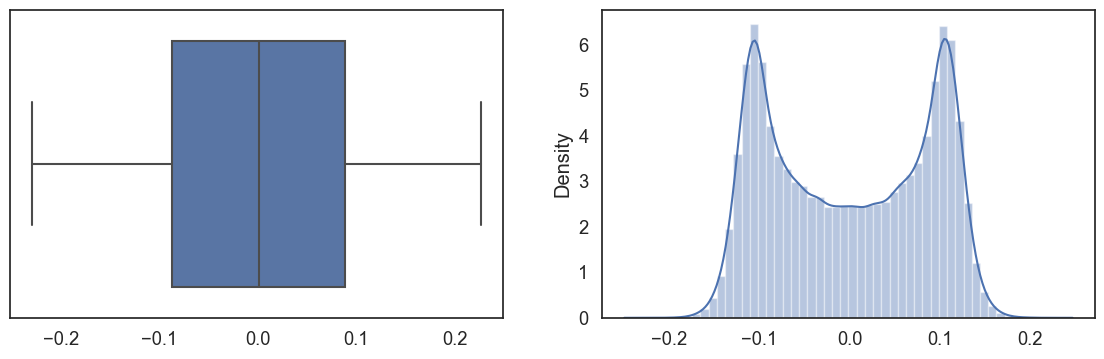

In [66]:
# show distribution of molecule signatures 
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.boxplot(ax=axes[0], x=mol_unique.values[:,0:256])
sns.distplot(ax=axes[1], x=mol_unique.values[:,0:256])

<AxesSubplot:ylabel='Density'>

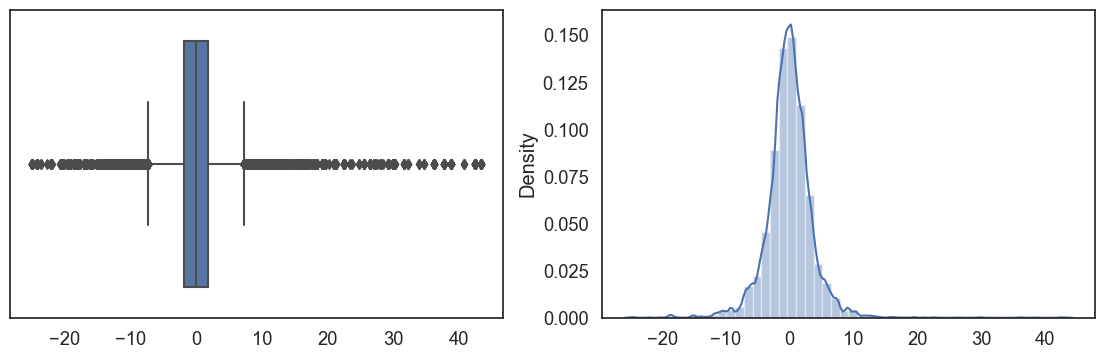

In [67]:
# show distribution of target features
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
sns.boxplot(ax=axes[0], x=mol_unique.values[:,256:384])
sns.distplot(ax=axes[1], x=mol_unique.values[:,256:384])

Number of queries: 1365


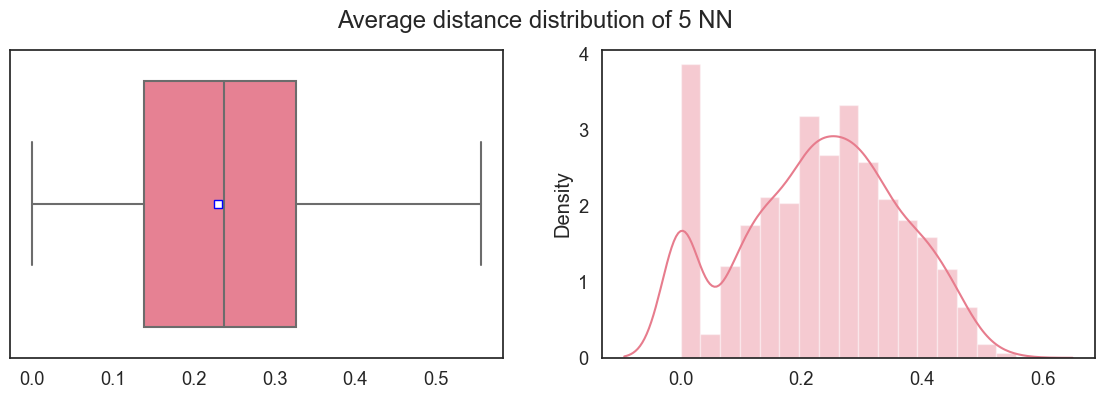

In [72]:
# get molecules nearest neighbors and AD threshold
X_mol = mol_unique.values[:,0:256]
y_mol = mol_unique.index
nn_dict_mol, thr = compute_ad(X_mol, y_mol, filename=output_path + "/F1F2_mol_nn_model.pkl")

In [23]:
# save neighbors
pickle.dump(nn_dict_mol, open(output_path + "/F1F2_mol_nn.pkl", "wb"))

In [25]:
# store molecules and AD threshold for F1F2
AD_thr = {}
AD_thr['F1F2_all_molecules']  = list(y_mol)        
AD_thr['F1F2_pos_molecules'] = list(pos_mol_unique - common_mol)               
AD_thr['F1F2_neg_molecules'] = list(neg_mol_unique - common_mol)
AD_thr['F1F2_molecule_thr'] = thr
AD_thr

{'F1F2_all_molecules': ['QAXXQMIHMLTJQI-UHFFFAOYSA-N',
  'CHBAWFGIXDBEBT-UHFFFAOYSA-N',
  'OWWIWYDDISJUMY-UHFFFAOYSA-N',
  'ZFFMLCVRJBZUDZ-UHFFFAOYSA-N',
  'HDGQICNBXPAKLR-UHFFFAOYSA-N',
  'LXBJRNXXTAWCKU-UHFFFAOYSA-N',
  'KEAZWUZFBSXOMV-UHFFFAOYSA-N',
  'GKOZUEZYRPOHIO-UHFFFAOYSA-N',
  'KDKYADYSIPSCCQ-UHFFFAOYSA-N',
  'JZMUUSXQSKCZNO-UHFFFAOYSA-N',
  'CWBIFDGMOSWLRQ-UHFFFAOYSA-N',
  'ODGLTLJZCVNPBU-UHFFFAOYSA-N',
  'WATWJIUSRGPENY-UHFFFAOYSA-N',
  'OFOBLEOULBTSOW-UHFFFAOYSA-N',
  'BBMCTIGTTCKYKF-UHFFFAOYSA-N',
  'JZBKRUIGSVOOIC-UHFFFAOYSA-N',
  'GDEQPEBFOWYWSA-UHFFFAOYSA-N',
  'QYIXCDOBOSTCEI-UHFFFAOYSA-N',
  'GUCVJGMIXFAOAE-UHFFFAOYSA-N',
  'PXHVJJICTQNCMI-UHFFFAOYSA-N',
  'SVGLFIBXFVQUQY-UHFFFAOYSA-N',
  'HQZHQNKZOYIKQC-UHFFFAOYSA-N',
  'ZALHPSXXQIPKTQ-UHFFFAOYSA-N',
  'PMJHHCWVYXUKFD-UHFFFAOYSA-N',
  'LGDSHSYDSCRFAB-UHFFFAOYSA-N',
  'DOYJTLUPPPUSMD-UHFFFAOYSA-N',
  'DMBHHRLKUKUOEG-UHFFFAOYSA-N',
  'YWCSZNJUSYMHHA-UHFFFAOYSA-N',
  'BYSRUWKGUGERFI-UHFFFAOYSA-N',
  'POOSGDOYLQNASK-UHF

Number of queries: 223


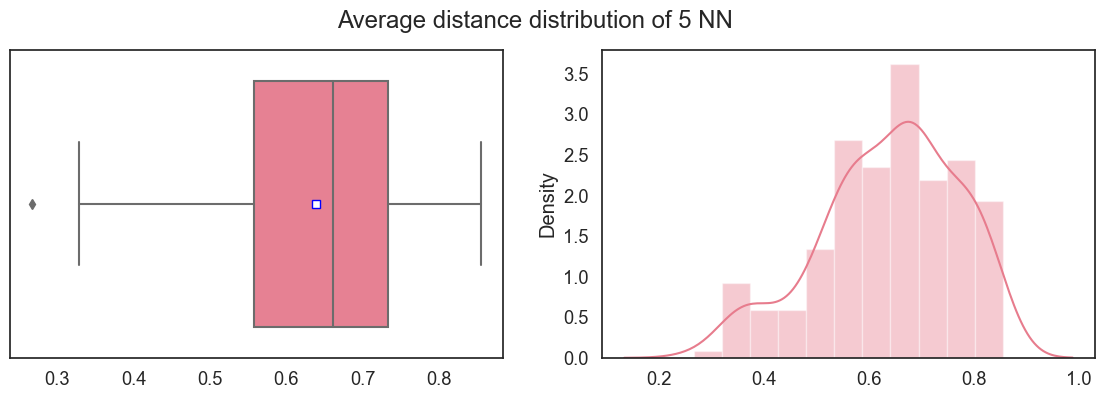

In [73]:
# get targets nearest neighbors and AD threshold
X_tg = tg_unique.values[:,256:384]
y_tg = tg_unique.index
nn_dict_tg, thr = compute_ad(X_tg, y_tg, filename=output_path + "/tg_nn_model.pkl")

In [75]:
# store targets and AD threshold
AD_thr['all_targets']  = list(y_tg) 
AD_thr['F1F2_pos_targets'] = list(pos_tg_unique - neg_tg_unique)               
AD_thr['target_thr'] = thr
AD_thr

{'F1F2_all_molecules': ['QAXXQMIHMLTJQI-UHFFFAOYSA-N',
  'CHBAWFGIXDBEBT-UHFFFAOYSA-N',
  'OWWIWYDDISJUMY-UHFFFAOYSA-N',
  'ZFFMLCVRJBZUDZ-UHFFFAOYSA-N',
  'HDGQICNBXPAKLR-UHFFFAOYSA-N',
  'LXBJRNXXTAWCKU-UHFFFAOYSA-N',
  'KEAZWUZFBSXOMV-UHFFFAOYSA-N',
  'GKOZUEZYRPOHIO-UHFFFAOYSA-N',
  'KDKYADYSIPSCCQ-UHFFFAOYSA-N',
  'JZMUUSXQSKCZNO-UHFFFAOYSA-N',
  'CWBIFDGMOSWLRQ-UHFFFAOYSA-N',
  'ODGLTLJZCVNPBU-UHFFFAOYSA-N',
  'WATWJIUSRGPENY-UHFFFAOYSA-N',
  'OFOBLEOULBTSOW-UHFFFAOYSA-N',
  'BBMCTIGTTCKYKF-UHFFFAOYSA-N',
  'JZBKRUIGSVOOIC-UHFFFAOYSA-N',
  'GDEQPEBFOWYWSA-UHFFFAOYSA-N',
  'QYIXCDOBOSTCEI-UHFFFAOYSA-N',
  'GUCVJGMIXFAOAE-UHFFFAOYSA-N',
  'PXHVJJICTQNCMI-UHFFFAOYSA-N',
  'SVGLFIBXFVQUQY-UHFFFAOYSA-N',
  'HQZHQNKZOYIKQC-UHFFFAOYSA-N',
  'ZALHPSXXQIPKTQ-UHFFFAOYSA-N',
  'PMJHHCWVYXUKFD-UHFFFAOYSA-N',
  'LGDSHSYDSCRFAB-UHFFFAOYSA-N',
  'DOYJTLUPPPUSMD-UHFFFAOYSA-N',
  'DMBHHRLKUKUOEG-UHFFFAOYSA-N',
  'YWCSZNJUSYMHHA-UHFFFAOYSA-N',
  'BYSRUWKGUGERFI-UHFFFAOYSA-N',
  'POOSGDOYLQNASK-UHF

In [28]:
# save neighbors
pickle.dump(nn_dict_tg, open(output_path + "/tg_nn.pkl", "wb"))

- A1-A2

In [76]:
## load A1A2 dataset 
A1A2_ds = {}
with open(dataset_path + "/A1A2_sampled_CT_ds.pkl", 'rb') as f:
   A1A2_ds['X'] = pickle.load(f)
   A1A2_ds['y'] = pickle.load(f)
f.close()
A1A2_ds['X'].shape

(28699, 384)

In [77]:
# get vectors for molecules according to inchikeys 
mol_idx = list([c[0] for c in A1A2_ds['y'].index])
mol_unique = pd.DataFrame(A1A2_ds['X'], index=mol_idx)
mol_unique = mol_unique.reset_index().drop_duplicates(subset='index', 
                                                      keep='first').set_index('index')
mol_unique  

,0,1,2,3,4,5,6,7,8,9,...,374,375,376,377,378,379,380,381,382,383
index,,,,,,,,,,,,,,,,,,,,,
HRLFUIXSXUASEX-UHFFFAOYSA-N,-0.100332,-0.005796,0.055444,0.105205,0.082008,0.013448,-0.097288,-0.105205,0.104166,0.022681,...,-0.548825,1.546066,0.776565,0.517322,-0.376400,1.145507,0.807739,-1.573457,0.007337,0.661948
POOSGDOYLQNASK-UHFFFAOYSA-N,-0.061086,0.089436,0.094063,0.094070,0.094070,0.092761,-0.094071,-0.094068,0.084873,0.094070,...,-1.568487,0.977143,-1.641257,1.311943,-1.286291,-1.345332,-1.898400,-1.068034,1.942832,-3.132106
CHIFOSRWCNZCFN-UHFFFAOYSA-N,-0.094597,0.087471,0.067060,0.094720,0.094720,0.094720,-0.027697,-0.094678,-0.094720,-0.094720,...,0.090293,-3.010492,0.455335,-0.134063,-0.464235,1.367499,-3.963149,2.477953,0.285656,-1.311931
OVWYEQOVUDKZNU-UHFFFAOYSA-N,-0.097974,-0.097836,-0.066068,0.065445,0.097945,-0.096061,-0.098036,0.096707,-0.098057,-0.095762,...,0.661076,-0.901528,1.201944,0.477022,-1.413921,0.411952,-0.368787,0.135687,0.525816,0.143308
GLDOVTGHNKAZLK-UHFFFAOYSA-N,0.008845,0.092882,0.094529,0.094543,0.094546,0.053956,-0.094546,-0.094547,0.088352,0.094546,...,-2.637340,0.808811,2.416246,5.702742,-0.255517,0.362377,-0.022569,1.850785,2.588858,1.011670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DHKHKXVYLBGOIT-UHFFFAOYSA-N,-0.097379,-0.094411,0.067762,0.094156,0.096666,0.096345,0.019713,-0.097286,0.097226,0.097375,...,-1.537250,0.047262,-2.084028,-0.435352,-0.610545,0.206409,0.157444,0.955766,0.247949,-0.265293
KFZMGEQAYNKOFK-UHFFFAOYSA-N,-0.094496,-0.092595,0.058849,-0.080484,0.091021,0.094272,0.094490,-0.094495,0.094496,0.094496,...,0.622414,0.227910,2.910849,1.968160,1.646625,-1.045739,-0.867811,-2.621237,3.205478,-2.853467
APQSQLNWAIULLK-UHFFFAOYSA-N,-0.099631,-0.066025,-0.099442,0.084177,-0.000995,0.045446,0.093331,-0.010652,0.099554,0.085280,...,2.140990,0.884817,-2.172677,0.125244,0.090602,-0.565395,1.537888,0.333554,1.582435,0.821568


In [78]:
# how many molecules are in positives? 
pos_mol_unique = set([pos[0] for pos in A1A2_ds['y'].iloc[np.where(A1A2_ds['y'].y == 1)].index])
len(pos_mol_unique)

499

In [79]:
# how many molecules are in negatives?
neg_mol_unique = set([neg[0] for neg in A1A2_ds['y'].iloc[np.where(A1A2_ds['y'].y == 0)].index])
len(neg_mol_unique)

632

In [80]:
# how many molecules are in both sets?
common_mol = pos_mol_unique.intersection(neg_mol_unique)
len(common_mol)

156

In [81]:
# how many targets are in negatives?
neg_tg_unique = set([neg[1] for neg in A1A2_ds['y'].iloc[np.where(A1A2_ds['y'].y == 0)].index])
len(neg_tg_unique)

168

<AxesSubplot:ylabel='Density'>

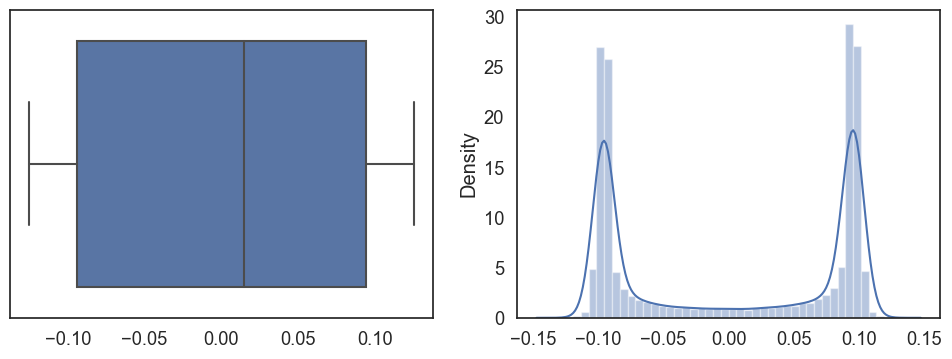

In [82]:
# show distribution of molecule signatures 
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(ax=axes[0], x=mol_unique.values[:,0:256])
sns.distplot(ax=axes[1], x=mol_unique.values[:,0:256])


Number of queries: 975


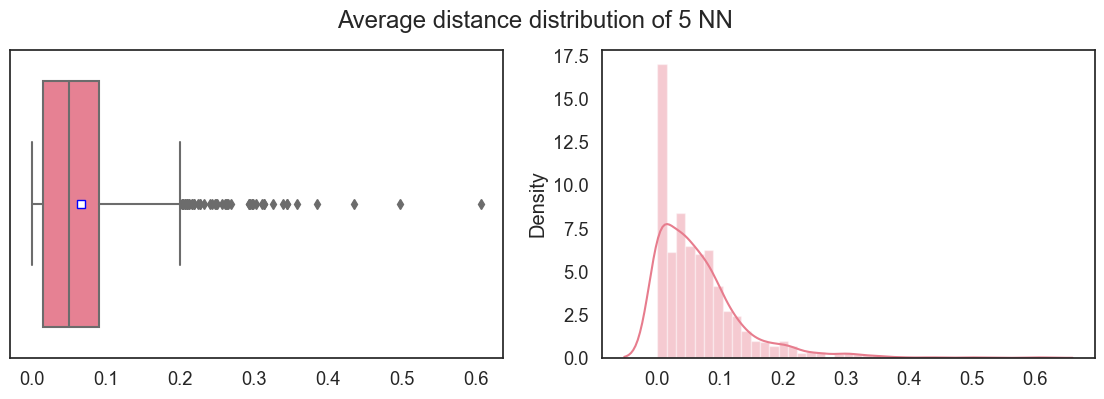

In [83]:
# get molecules nearest neighbors and AD threshold
X_mol = mol_unique.values[:,0:256]
y_mol = mol_unique.index
nn_dict_mol, thr = compute_ad(X_mol, y_mol, filename=output_path + "/A1A2_mol_nn_model.pkl")

In [84]:
# save neighbors
pickle.dump(nn_dict_mol, open(output_path + "/A1A2_mol_nn.pkl", "wb"))

In [86]:
# store molecules, targets and AD threshold for A1A2
AD_thr['A1A2_all_molecules']  = list(y_mol)        
AD_thr['A1A2_pos_molecules']  = list(pos_mol_unique - common_mol)               
AD_thr['A1A2_neg_molecules']  = list(neg_mol_unique - common_mol)
AD_thr['A1A2_pos_targets']    = list(pos_tg_unique - neg_tg_unique)
AD_thr['A1A2_molecule_thr']   = thr
AD_thr

{'F1F2_all_molecules': ['QAXXQMIHMLTJQI-UHFFFAOYSA-N',
  'CHBAWFGIXDBEBT-UHFFFAOYSA-N',
  'OWWIWYDDISJUMY-UHFFFAOYSA-N',
  'ZFFMLCVRJBZUDZ-UHFFFAOYSA-N',
  'HDGQICNBXPAKLR-UHFFFAOYSA-N',
  'LXBJRNXXTAWCKU-UHFFFAOYSA-N',
  'KEAZWUZFBSXOMV-UHFFFAOYSA-N',
  'GKOZUEZYRPOHIO-UHFFFAOYSA-N',
  'KDKYADYSIPSCCQ-UHFFFAOYSA-N',
  'JZMUUSXQSKCZNO-UHFFFAOYSA-N',
  'CWBIFDGMOSWLRQ-UHFFFAOYSA-N',
  'ODGLTLJZCVNPBU-UHFFFAOYSA-N',
  'WATWJIUSRGPENY-UHFFFAOYSA-N',
  'OFOBLEOULBTSOW-UHFFFAOYSA-N',
  'BBMCTIGTTCKYKF-UHFFFAOYSA-N',
  'JZBKRUIGSVOOIC-UHFFFAOYSA-N',
  'GDEQPEBFOWYWSA-UHFFFAOYSA-N',
  'QYIXCDOBOSTCEI-UHFFFAOYSA-N',
  'GUCVJGMIXFAOAE-UHFFFAOYSA-N',
  'PXHVJJICTQNCMI-UHFFFAOYSA-N',
  'SVGLFIBXFVQUQY-UHFFFAOYSA-N',
  'HQZHQNKZOYIKQC-UHFFFAOYSA-N',
  'ZALHPSXXQIPKTQ-UHFFFAOYSA-N',
  'PMJHHCWVYXUKFD-UHFFFAOYSA-N',
  'LGDSHSYDSCRFAB-UHFFFAOYSA-N',
  'DOYJTLUPPPUSMD-UHFFFAOYSA-N',
  'DMBHHRLKUKUOEG-UHFFFAOYSA-N',
  'YWCSZNJUSYMHHA-UHFFFAOYSA-N',
  'BYSRUWKGUGERFI-UHFFFAOYSA-N',
  'POOSGDOYLQNASK-UHF

- MFP

In [87]:
## load MFP dataset 
MFP_ds = {}
with open(dataset_path + "/MFP_sampled_CT_ds.pkl", 'rb') as f:
   MFP_ds['X'] = pickle.load(f)
   MFP_ds['y'] = pickle.load(f)
f.close()
MFP_ds['X'].shape

(28699, 1152)

In [103]:
# get vectors for molecules according to inchikeys 
mol_idx = list([c[0] for c in MFP_ds['y'].index])
mol_unique = pd.DataFrame(MFP_ds['X'], index=mol_idx)
mol_unique = mol_unique.reset_index().drop_duplicates(subset='index', 
                                                      keep='first').set_index('index')
mol_unique  

,0,1,2,3,4,5,6,7,8,9,...,1142,1143,1144,1145,1146,1147,1148,1149,1150,1151
index,,,,,,,,,,,,,,,,,,,,,
PYOKUURKVVELLB-UHFFFAOYSA-N,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.282322,-2.776361,3.590290,2.844539,-0.191019,-0.374157,3.328686,-3.025687,0.695406,1.090270
HRYZWHHZPQKTII-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.478458,-3.009516,-0.240160,0.379248,-2.860962,0.466831,-0.048139,-2.362534,5.930712,-0.482899
RYPKRALMXUUNKS-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.613492,1.327325,-1.286246,1.200594,0.312033,2.263012,1.047827,-0.071733,-3.173866,-3.635807
DUPUVYJQZSLSJB-UHFFFAOYSA-N,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.215780,4.556391,-0.016535,-0.689158,2.142522,1.938653,1.534614,1.684995,-2.189843,0.855024
JOPOVCBBYLSVDA-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.143241,0.859968,2.281985,0.433286,2.415660,2.436434,-0.615094,1.367600,2.013542,-0.979690
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NQAVPKIJZCHUNS-UHFFFAOYSA-N,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,-0.480272,2.054427,-0.395464,0.834398,0.603317,0.647891,2.346247,-3.151724,-0.331431,0.584075
APQSQLNWAIULLK-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.140990,0.884817,-2.172677,0.125244,0.090602,-0.565395,1.537888,0.333554,1.582435,0.821568
RJUFJBKOKNCXHH-UHFFFAOYSA-N,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.480272,2.054427,-0.395464,0.834398,0.603317,0.647891,2.346247,-3.151724,-0.331431,0.584075


In [89]:
# how many molecules are in positives? 
pos_mol_unique = set([pos[0] for pos in MFP_ds['y'].iloc[np.where(MFP_ds['y'].y == 1)].index])
len(pos_mol_unique)

499

In [90]:
# how many molecules are in negatives?
neg_mol_unique = set([neg[0] for neg in MFP_ds['y'].iloc[np.where(MFP_ds['y'].y == 0)].index])
len(neg_mol_unique)

952

In [91]:
# how many molecules are in both sets?
common_mol = pos_mol_unique.intersection(neg_mol_unique)
len(common_mol)

172

In [93]:
# how many targets are in positives?   
pos_tg_unique = set([pos[1] for pos in MFP_ds['y'].iloc[np.where(MFP_ds['y'].y == 1)].index])
len(pos_tg_unique)

223

In [94]:
# how many targets are in negatives?
neg_tg_unique = set([neg[1] for neg in MFP_ds['y'].iloc[np.where(MFP_ds['y'].y == 0)].index])
len(neg_tg_unique)

91

<AxesSubplot:ylabel='Density'>

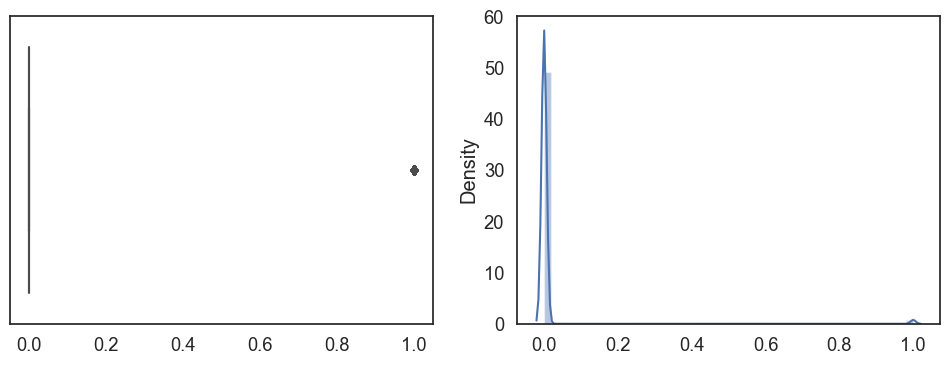

In [95]:
# show distribution of molecule fingerprints
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(ax=axes[0], x=mol_unique.values[:,0:1024])
sns.distplot(ax=axes[1], x=mol_unique.values[:,0:1024])


Number of queries: 1279


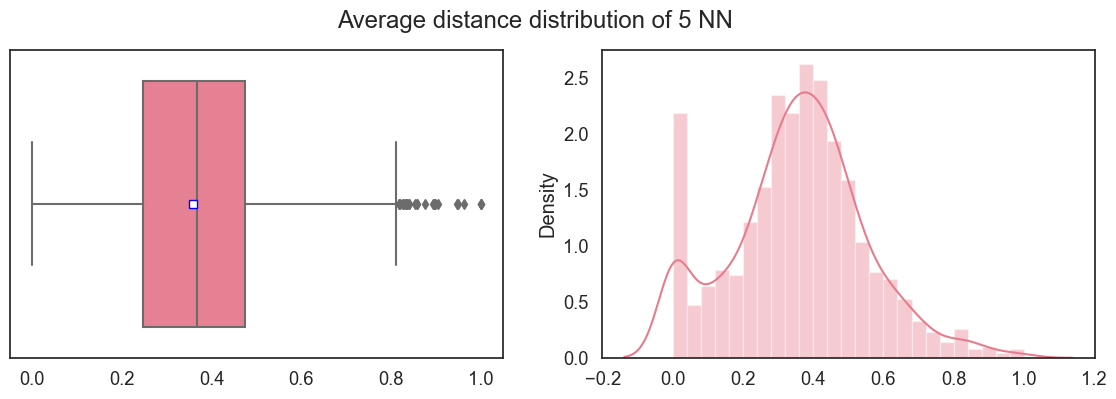

In [96]:
# get molecules nearest neighbors and AD threshold
X_mol = mol_unique.values[:,0:1024]
y_mol = mol_unique.index
nn_dict_mol, thr = compute_ad(X_mol, y_mol, filename=output_path + "/MFP_mol_nn_model.pkl")

In [97]:
# save neighbors
pickle.dump(nn_dict_mol, open(output_path + "/MFP_mol_nn.pkl", "wb"))

In [98]:
# store molecules, targets and AD threshold for MFP
AD_thr['MFP_all_molecules']  = list(y_mol)        
AD_thr['MFP_pos_molecules'] = list(pos_mol_unique - common_mol)               
AD_thr['MFP_neg_molecules'] = list(neg_mol_unique - common_mol)
AD_thr['MFP_pos_targets'] = list(pos_tg_unique - neg_tg_unique)
AD_thr['MFP_molecule_thr'] = thr
AD_thr

{'F1F2_all_molecules': ['QAXXQMIHMLTJQI-UHFFFAOYSA-N',
  'CHBAWFGIXDBEBT-UHFFFAOYSA-N',
  'OWWIWYDDISJUMY-UHFFFAOYSA-N',
  'ZFFMLCVRJBZUDZ-UHFFFAOYSA-N',
  'HDGQICNBXPAKLR-UHFFFAOYSA-N',
  'LXBJRNXXTAWCKU-UHFFFAOYSA-N',
  'KEAZWUZFBSXOMV-UHFFFAOYSA-N',
  'GKOZUEZYRPOHIO-UHFFFAOYSA-N',
  'KDKYADYSIPSCCQ-UHFFFAOYSA-N',
  'JZMUUSXQSKCZNO-UHFFFAOYSA-N',
  'CWBIFDGMOSWLRQ-UHFFFAOYSA-N',
  'ODGLTLJZCVNPBU-UHFFFAOYSA-N',
  'WATWJIUSRGPENY-UHFFFAOYSA-N',
  'OFOBLEOULBTSOW-UHFFFAOYSA-N',
  'BBMCTIGTTCKYKF-UHFFFAOYSA-N',
  'JZBKRUIGSVOOIC-UHFFFAOYSA-N',
  'GDEQPEBFOWYWSA-UHFFFAOYSA-N',
  'QYIXCDOBOSTCEI-UHFFFAOYSA-N',
  'GUCVJGMIXFAOAE-UHFFFAOYSA-N',
  'PXHVJJICTQNCMI-UHFFFAOYSA-N',
  'SVGLFIBXFVQUQY-UHFFFAOYSA-N',
  'HQZHQNKZOYIKQC-UHFFFAOYSA-N',
  'ZALHPSXXQIPKTQ-UHFFFAOYSA-N',
  'PMJHHCWVYXUKFD-UHFFFAOYSA-N',
  'LGDSHSYDSCRFAB-UHFFFAOYSA-N',
  'DOYJTLUPPPUSMD-UHFFFAOYSA-N',
  'DMBHHRLKUKUOEG-UHFFFAOYSA-N',
  'YWCSZNJUSYMHHA-UHFFFAOYSA-N',
  'BYSRUWKGUGERFI-UHFFFAOYSA-N',
  'POOSGDOYLQNASK-UHF

- APchem

In [104]:
## load APchem dataset 
APchem_ds = {}
with open(dataset_path + "/APchem_sampled_CT_ds.pkl", 'rb') as f:
   APchem_ds['X'] = pickle.load(f)
   APchem_ds['y'] = pickle.load(f)
f.close()
APchem_ds['X'].shape

(28699, 640)

In [105]:
# get vectors for molecules according to inchikeys 
mol_idx = list([c[0] for c in APchem_ds['y'].index])
mol_unique = pd.DataFrame(APchem_ds['X'], index=mol_idx)
mol_unique = mol_unique.reset_index().drop_duplicates(subset='index', 
                                                      keep='first').set_index('index')
mol_unique 

,0,1,2,3,4,5,6,7,8,9,...,630,631,632,633,634,635,636,637,638,639
index,,,,,,,,,,,,,,,,,,,,,
AOAFVSVYRSUDBN-UHFFFAOYSA-N,-0.001908,-0.064080,-0.128288,0.107674,0.099310,-0.118458,0.122916,-0.038199,0.066521,-0.072886,...,1.469082,-0.803974,0.741474,-0.817796,0.410860,-0.908295,-0.269390,-0.736702,-0.911103,3.690110
SEEOMASXHIJCDV-UHFFFAOYSA-N,0.091819,-0.106032,-0.123909,0.048733,0.094670,-0.098094,0.055070,0.089643,0.044328,-0.086293,...,-1.626695,2.355822,3.335158,-1.017390,-1.189084,-4.072363,2.226506,-2.605164,-1.294466,-1.306211
WGECXQBGLLYSFP-UHFFFAOYSA-N,-0.093462,0.073906,-0.069736,0.053484,0.093408,0.113780,0.109214,0.012889,0.017887,0.117449,...,0.066910,0.655984,1.686490,1.713662,-1.164498,0.233988,0.551067,2.187974,-0.375483,-0.403651
YMBNRMDSLJNNPF-UHFFFAOYSA-N,-0.108999,-0.083992,0.062771,0.089527,0.094806,0.110502,0.106463,-0.098123,-0.074854,0.094601,...,-2.999027,-1.791601,2.140936,-1.075693,-0.768629,-2.323923,1.937708,1.513917,1.121374,0.738502
OMXANELYEWRDAW-UHFFFAOYSA-N,0.084862,-0.099777,0.079265,0.078206,0.097434,-0.099316,0.095407,0.094184,0.041933,-0.095768,...,1.469082,-0.803974,0.741474,-0.817796,0.410860,-0.908295,-0.269390,-0.736702,-0.911103,3.690110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MATGKVZWFZHCLI-LSDHHAIUSA-N,0.097269,-0.013156,-0.109230,-0.107781,0.060593,-0.107983,-0.101806,0.096926,0.105069,-0.109150,...,-1.585970,-1.709559,-1.967317,-2.039445,-0.306166,-0.331484,4.012916,-2.231691,-1.175249,-1.491115
MCSAJNNLRCFZED-UHFFFAOYSA-N,0.019567,0.130106,-0.119593,0.034670,0.108944,0.059048,0.090810,0.036945,0.102738,0.055465,...,-1.537250,0.047262,-2.084028,-0.435352,-0.610545,0.206409,0.157444,0.955766,0.247949,-0.265293
RYHBNJHYFVUHQT-UHFFFAOYSA-N,0.107418,0.068095,-0.025452,0.017074,-0.058508,0.127956,-0.006962,-0.142904,-0.035886,-0.109372,...,-1.537250,0.047262,-2.084028,-0.435352,-0.610545,0.206409,0.157444,0.955766,0.247949,-0.265293


In [106]:
# how many molecules are in positives? 
pos_mol_unique = set([pos[0] for pos in APchem_ds['y'].iloc[np.where(APchem_ds['y'].y == 1)].index])
len(pos_mol_unique)

499

In [107]:
# how many molecules are in negatives?
neg_mol_unique = set([neg[0] for neg in APchem_ds['y'].iloc[np.where(APchem_ds['y'].y == 0)].index])
len(neg_mol_unique)

779

In [108]:
# how many molecules are in both sets?
common_mol = pos_mol_unique.intersection(neg_mol_unique)
len(common_mol)

117

In [109]:
# how many targets are in negatives?
neg_tg_unique = set([neg[1] for neg in APchem_ds['y'].iloc[np.where(APchem_ds['y'].y == 0)].index])
len(neg_tg_unique)

169

<AxesSubplot:ylabel='Density'>

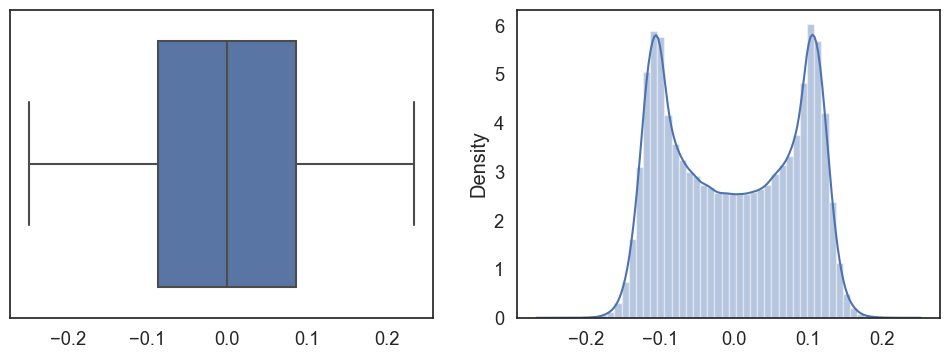

In [110]:
# show distribution of molecule signatures
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(ax=axes[0], x=mol_unique.values[:,0:512])
sns.distplot(ax=axes[1], x=mol_unique.values[:,0:512])

Number of queries: 1161


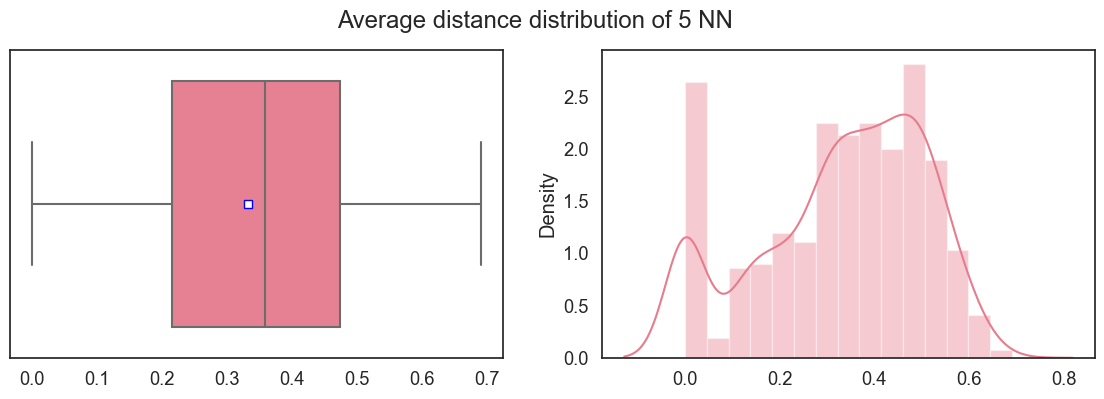

In [111]:
# get molecules nearest neighbors and AD threshold
X_mol = mol_unique.values[:,0:512]
y_mol = mol_unique.index
nn_dict_mol, thr = compute_ad(X_mol, y_mol, filename=output_path + "/APchem_mol_nn_model.pkl")

In [112]:
# save neighbors
pickle.dump(nn_dict_mol, open(output_path + "/APchem_mol_nn.pkl", "wb"))

In [113]:
# store molecules, targets and AD threshold for APchem
AD_thr['APchem_all_molecules']  = list(y_mol)        
AD_thr['APchem_pos_molecules']  = list(pos_mol_unique - common_mol)               
AD_thr['APchem_neg_molecules']  = list(neg_mol_unique - common_mol)
AD_thr['APchem_pos_targets']    = list(pos_tg_unique - neg_tg_unique)   
AD_thr['APchem_molecule_thr']   = thr
AD_thr

{'F1F2_all_molecules': ['QAXXQMIHMLTJQI-UHFFFAOYSA-N',
  'CHBAWFGIXDBEBT-UHFFFAOYSA-N',
  'OWWIWYDDISJUMY-UHFFFAOYSA-N',
  'ZFFMLCVRJBZUDZ-UHFFFAOYSA-N',
  'HDGQICNBXPAKLR-UHFFFAOYSA-N',
  'LXBJRNXXTAWCKU-UHFFFAOYSA-N',
  'KEAZWUZFBSXOMV-UHFFFAOYSA-N',
  'GKOZUEZYRPOHIO-UHFFFAOYSA-N',
  'KDKYADYSIPSCCQ-UHFFFAOYSA-N',
  'JZMUUSXQSKCZNO-UHFFFAOYSA-N',
  'CWBIFDGMOSWLRQ-UHFFFAOYSA-N',
  'ODGLTLJZCVNPBU-UHFFFAOYSA-N',
  'WATWJIUSRGPENY-UHFFFAOYSA-N',
  'OFOBLEOULBTSOW-UHFFFAOYSA-N',
  'BBMCTIGTTCKYKF-UHFFFAOYSA-N',
  'JZBKRUIGSVOOIC-UHFFFAOYSA-N',
  'GDEQPEBFOWYWSA-UHFFFAOYSA-N',
  'QYIXCDOBOSTCEI-UHFFFAOYSA-N',
  'GUCVJGMIXFAOAE-UHFFFAOYSA-N',
  'PXHVJJICTQNCMI-UHFFFAOYSA-N',
  'SVGLFIBXFVQUQY-UHFFFAOYSA-N',
  'HQZHQNKZOYIKQC-UHFFFAOYSA-N',
  'ZALHPSXXQIPKTQ-UHFFFAOYSA-N',
  'PMJHHCWVYXUKFD-UHFFFAOYSA-N',
  'LGDSHSYDSCRFAB-UHFFFAOYSA-N',
  'DOYJTLUPPPUSMD-UHFFFAOYSA-N',
  'DMBHHRLKUKUOEG-UHFFFAOYSA-N',
  'YWCSZNJUSYMHHA-UHFFFAOYSA-N',
  'BYSRUWKGUGERFI-UHFFFAOYSA-N',
  'POOSGDOYLQNASK-UHF

- CCchem

In [114]:
## load CCchem dataset 
CCchem_ds = {}
with open(dataset_path + "/CCchem_sampled_CT_ds.pkl", 'rb') as f:
   CCchem_ds['X'] = pickle.load(f)
   CCchem_ds['y'] = pickle.load(f)
f.close()
CCchem_ds['X'].shape

(28699, 768)

In [115]:
# get vectors for molecules according to inchikeys 
mol_idx = list([c[0] for c in CCchem_ds['y'].index])
mol_unique = pd.DataFrame(CCchem_ds['X'], index=mol_idx)
mol_unique = mol_unique.reset_index().drop_duplicates(subset='index', 
                                                      keep='first').set_index('index')
mol_unique  

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
index,,,,,,,,,,,,,,,,,,,,,
MAZCGYFIOOIVHE-UHFFFAOYSA-N,-0.093919,-0.014664,0.088188,0.094002,0.094002,0.094002,0.086710,-0.093966,-0.094002,-0.094002,...,0.802815,-2.592584,-1.082722,-1.402212,-1.058242,0.663649,0.662200,0.164220,0.520162,-0.440774
ZDPHROOEEOARMN-UHFFFAOYSA-N,0.033401,0.092036,0.092453,0.092492,0.092492,-0.050553,-0.092493,-0.092493,0.077243,0.092492,...,-0.724767,-0.217470,-1.699743,1.962188,-0.568347,-1.481404,0.737854,1.353076,-0.399320,-1.590846
ZSDSQXJSNMTJDA-UHFFFAOYSA-N,-0.093490,0.092996,0.072156,0.093559,0.093559,0.093559,0.083826,-0.093547,-0.093559,-0.093559,...,2.203674,-0.379263,-1.043837,-2.749782,-3.673548,-0.382662,2.167121,0.028987,-0.981119,-3.535408
FMMWHPNWAFZXNH-UHFFFAOYSA-N,-0.076571,0.070494,-0.097311,0.098718,-0.040062,-0.063853,-0.092163,0.098360,0.098714,0.071147,...,-2.008312,-0.446320,-2.378458,-2.411149,-1.365781,0.487619,2.184411,0.999750,0.404678,-0.261328
UXBFAGQTUAMQSX-UHFFFAOYSA-N,0.037499,-0.104267,-0.104531,0.104024,-0.104741,-0.103507,-0.102619,-0.104581,0.104082,-0.025143,...,2.660830,1.517984,3.521517,1.006626,-3.997309,1.496309,-0.810286,1.035207,-2.167612,1.520923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
KFZMGEQAYNKOFK-UHFFFAOYSA-N,-0.094496,-0.092595,0.058849,-0.080484,0.091021,0.094272,0.094490,-0.094495,0.094496,0.094496,...,0.622414,0.227910,2.910849,1.968160,1.646625,-1.045739,-0.867811,-2.621237,3.205478,-2.853467
APQSQLNWAIULLK-UHFFFAOYSA-N,-0.099631,-0.066025,-0.099442,0.084177,-0.000995,0.045446,0.093331,-0.010652,0.099554,0.085280,...,2.140990,0.884817,-2.172677,0.125244,0.090602,-0.565395,1.537888,0.333554,1.582435,0.821568
RYHBNJHYFVUHQT-UHFFFAOYSA-N,-0.096928,-0.096530,-0.096526,0.096722,-0.068047,0.095291,0.095935,-0.092805,0.096620,0.096773,...,-1.537250,0.047262,-2.084028,-0.435352,-0.610545,0.206409,0.157444,0.955766,0.247949,-0.265293


In [116]:
# how many molecules are in positives? 
pos_mol_unique = set([pos[0] for pos in CCchem_ds['y'].iloc[np.where(CCchem_ds['y'].y == 1)].index])
len(pos_mol_unique)

499

In [117]:
# how many molecules are in negatives?
neg_mol_unique = set([neg[0] for neg in CCchem_ds['y'].iloc[np.where(CCchem_ds['y'].y == 0)].index])
len(neg_mol_unique)

839

In [122]:
# how many molecules are in both sets?
common_mol = pos_mol_unique.intersection(neg_mol_unique)
len(common_mol)

228

In [124]:
# how many targets are in negatives?
neg_tg_unique = set([neg[1] for neg in CCchem_ds['y'].iloc[np.where(CCchem_ds['y'].y == 0)].index])
len(neg_tg_unique)

181

<AxesSubplot:ylabel='Density'>

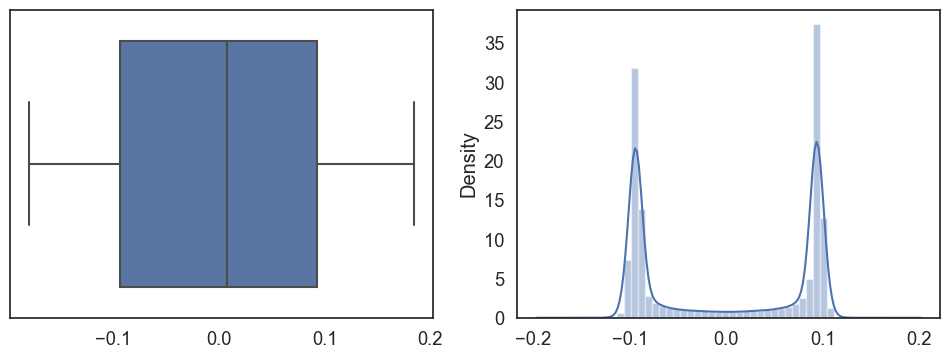

In [125]:
# show distribution of molecule fingerprints
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.boxplot(ax=axes[0], x=mol_unique.values[:,0:640])
sns.distplot(ax=axes[1], x=mol_unique.values[:,0:640])

Number of queries: 1110


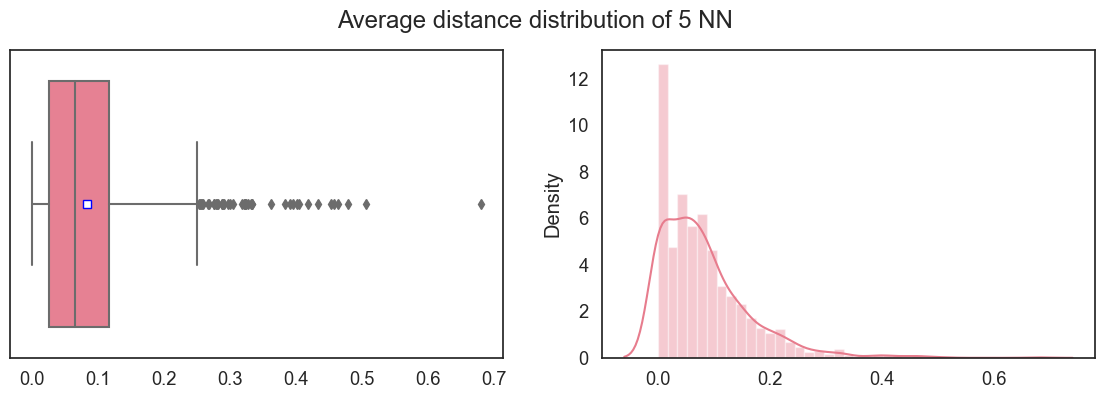

In [126]:
# get molecules nearest neighbors and AD threshold
X_mol = mol_unique.values[:,0:640]
y_mol = mol_unique.index
nn_dict_mol, thr = compute_ad(X_mol, y_mol, filename=output_path + "/CCchem_mol_nn_model.pkl")

In [127]:
# save neighbors
pickle.dump(nn_dict_mol, open(output_path + "/CCchem_mol_nn.pkl", "wb"))

In [128]:
# store molecules, targets and AD threshold for CCchem
AD_thr['CCchem_all_molecules']  = list(y_mol)        
AD_thr['CCchem_pos_molecules']  = list(pos_mol_unique - common_mol)               
AD_thr['CCchem_neg_molecules']  = list(neg_mol_unique - common_mol)
AD_thr['CCchem_pos_targets']    = list(pos_tg_unique - neg_tg_unique)   
AD_thr['CCchem_molecule_thr']   = thr
AD_thr

{'F1F2_all_molecules': ['QAXXQMIHMLTJQI-UHFFFAOYSA-N',
  'CHBAWFGIXDBEBT-UHFFFAOYSA-N',
  'OWWIWYDDISJUMY-UHFFFAOYSA-N',
  'ZFFMLCVRJBZUDZ-UHFFFAOYSA-N',
  'HDGQICNBXPAKLR-UHFFFAOYSA-N',
  'LXBJRNXXTAWCKU-UHFFFAOYSA-N',
  'KEAZWUZFBSXOMV-UHFFFAOYSA-N',
  'GKOZUEZYRPOHIO-UHFFFAOYSA-N',
  'KDKYADYSIPSCCQ-UHFFFAOYSA-N',
  'JZMUUSXQSKCZNO-UHFFFAOYSA-N',
  'CWBIFDGMOSWLRQ-UHFFFAOYSA-N',
  'ODGLTLJZCVNPBU-UHFFFAOYSA-N',
  'WATWJIUSRGPENY-UHFFFAOYSA-N',
  'OFOBLEOULBTSOW-UHFFFAOYSA-N',
  'BBMCTIGTTCKYKF-UHFFFAOYSA-N',
  'JZBKRUIGSVOOIC-UHFFFAOYSA-N',
  'GDEQPEBFOWYWSA-UHFFFAOYSA-N',
  'QYIXCDOBOSTCEI-UHFFFAOYSA-N',
  'GUCVJGMIXFAOAE-UHFFFAOYSA-N',
  'PXHVJJICTQNCMI-UHFFFAOYSA-N',
  'SVGLFIBXFVQUQY-UHFFFAOYSA-N',
  'HQZHQNKZOYIKQC-UHFFFAOYSA-N',
  'ZALHPSXXQIPKTQ-UHFFFAOYSA-N',
  'PMJHHCWVYXUKFD-UHFFFAOYSA-N',
  'LGDSHSYDSCRFAB-UHFFFAOYSA-N',
  'DOYJTLUPPPUSMD-UHFFFAOYSA-N',
  'DMBHHRLKUKUOEG-UHFFFAOYSA-N',
  'YWCSZNJUSYMHHA-UHFFFAOYSA-N',
  'BYSRUWKGUGERFI-UHFFFAOYSA-N',
  'POOSGDOYLQNASK-UHF

In [129]:
# save AD
pickle.dump(AD_thr, open(output_path + "/AD_thr.pkl", "wb"))